In [1]:
import pandas as pd
from ipywidgets import IntProgress
from IPython.display import display
import statsmodels.api as sm
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.preprocessing import normalize
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
import scipy.stats as stats
from IPython.display import HTML, Math
from decimal import Decimal

In [2]:
tracks = pd.read_csv('fma_metadata/tracks.csv', header=[0,1,2])
tracks.head(100)

Unnamed: 0_level_0              album                       \
   Unnamed: 0_level_1           comments         date_created   
             track_id Unnamed: 1_level_2   Unnamed: 2_level_2   
0                   2                  0  2008-11-26 01:44:45   
1                   3                  0  2008-11-26 01:44:45   
2                   5                  0  2008-11-26 01:44:45   
3                  10                  0  2008-11-26 01:45:08   
4                  20                  0  2008-11-26 01:45:05   
5                  26                  0  2008-11-26 01:45:05   
6                  30                  0  2008-11-26 01:45:05   
7                  46                  0  2008-11-26 01:45:05   
8                  48                  0  2008-11-26 01:45:05   
9                 134                  0  2008-11-26 01:44:45   
10                135                  1  2008-11-26 01:49:19   
11                136                  1  2008-11-26 01:49:19   
12                137                  1  2008-11-26 01:49:35   
13                138                  1  2008-11-26 01:49:35   
14                139                  0  2008-11-26 01:49:57   
15                140                  1  2008-11-26 01:49:59   
16                141                  0  2008-11-26 01:49:57   
17                142                  0  2008-11-26 01:50:03   
18                144                  0  2008-11-26 01:50:07   
19                145                  0  2008-11-26 01:50:07   
20                146                  0  2008-11-26 01:50:13   
21                147                  0  2008-11-26 01:50:13   
22                148                  0  2008-11-26 01:50:19   
23                149                  0  2008-11-26 01:50:25   
24                150                  0  2008-11-26 01:50:25   
25                151                  0  2008-11-26 01:50:46   
26                152                  0  2008-11-26 01:50:46   
27                153                  0  2008-11-26 01:50:50   
28                154                  0  2008-11-26 01:50:50   
29                155                  0  2008-11-26 01:51:00   
..                ...                ...                  ...   
70                199                  0  2008-11-26 01:52:33   
71                200                  0  2008-11-26 01:52:31   
72                201                  0  2008-11-26 01:52:33   
73                202                  0  2008-11-26 01:52:33   
74                203                  0  2008-11-26 01:52:31   
75                204                  0  2008-11-26 01:52:31   
76                205                  0  2008-11-26 01:52:33   
77                206                  0  2008-11-26 01:52:33   
78                207                  0  2008-11-26 01:52:31   
79                208                  0  2008-11-26 01:52:31   
80                209                  0  2008-11-26 01:52:31   
81                210                  0  2008-11-26 01:52:31   
82                211                  0  2008-11-26 01:52:31   
83                212                  0  2008-11-26 01:52:31   
84                213                  0  2008-11-26 01:53:47   
85                226                  0  2008-11-26 01:54:25   
86                228                  0  2008-11-26 01:54:25   
87                236                  0  2008-11-26 01:54:55   
88                237                  0  2008-11-26 01:55:00   
89                238                  0  2008-11-26 01:55:00   
90                246                  0  2008-11-26 01:55:43   
91                247                  0  2008-11-26 01:55:44   
92                248                  0  2008-11-26 01:55:47   
93                249                  0  2008-11-26 01:55:44   
94                250                  0  2008-11-26 01:55:47   
95                251                  0  2008-11-26 01:55:47   
96                252                  0  2008-11-26 01:55:44   
97                253                 

In [9]:
tracks[('album', 'type', 'Unnamed: 13_level_2')].head(100)

0                Album
1                Album
2                Album
3                Album
4                Album
5                Album
6                Album
7                Album
8                Album
9                Album
10       Single Tracks
11       Single Tracks
12    Live Performance
13    Live Performance
14               Album
15               Album
16               Album
17               Album
18               Album
19               Album
20               Album
21               Album
22               Album
23               Album
24               Album
25               Album
26               Album
27               Album
28               Album
29       Single Tracks
            ...       
70               Album
71               Album
72               Album
73               Album
74               Album
75               Album
76               Album
77               Album
78               Album
79               Album
80               Album
81               Album
82         

In [13]:
features = [('album', 'comments', 'Unnamed: 1_level_2'),
('album', 'date_created', 'Unnamed: 2_level_2'),
('album', 'date_released', 'Unnamed: 3_level_2'),
('album', 'favorites', 'Unnamed: 5_level_2'),
('album', 'listens', 'Unnamed: 8_level_2'),
('album', 'tags', 'Unnamed: 10_level_2'),
('album', 'tracks', 'Unnamed: 12_level_2'),
('album', 'type', 'Unnamed: 13_level_2'),
('artist', 'active_year_begin', 'Unnamed: 14_level_2'),
('artist', 'active_year_end', 'Unnamed: 15_level_2'),
('artist', 'comments', 'Unnamed: 18_level_2'),
('artist', 'date_created', 'Unnamed: 19_level_2'),
('artist', 'favorites', 'Unnamed: 20_level_2'),
# ('artist', 'location', 'Unnamed: 23_level_2'),
('artist', 'tags', 'Unnamed: 28_level_2'),
('set', 'split', 'Unnamed: 31_level_2'),
('set', 'subset', 'Unnamed: 32_level_2'),
('track', 'comments', 'Unnamed: 34_level_2'),
('track', 'date_created', 'Unnamed: 36_level_2'),
('track', 'date_recorded', 'Unnamed: 37_level_2'),
('track', 'duration', 'Unnamed: 38_level_2'),
('track', 'favorites', 'Unnamed: 39_level_2'),
('track', 'genre_top', 'Unnamed: 40_level_2'),
('track', 'genres', 'Unnamed: 41_level_2'),
('track', 'genres_all', 'Unnamed: 42_level_2'),
('track', 'interest', 'Unnamed: 44_level_2'),
('track', 'language_code', 'Unnamed: 45_level_2'),
('track', 'listens', 'Unnamed: 47_level_2'),
('track', 'number', 'Unnamed: 49_level_2'),
('track', 'tags', 'Unnamed: 51_level_2')]

df = pd.DataFrame()
for v in features:
    df["{}:{}".format(v[0],v[1])] = tracks[v]

Y_col = 'track:genre_top'
date_l = ['album:date_created', 'album:date_released', 'artist:active_year_begin', 'artist:active_year_end', 'artist:date_created', 'track:date_created', 'track:date_recorded']
one_hot_l = ['album:type', 'track:language_code']
one_hot_c = ['album:tags', 'artist:tags', 'track:genres', 'track:genres_all', 'track:tags']
exclude_l = ['set:split', 'set:subset']

for d in date_l:
    df[d] = pd.to_numeric(pd.to_datetime(df[d]))

Y_cols = []
dummy = pd.get_dummies(df[Y_col])
for v in dummy:
    df["{}:{}".format(Y_col, v)] = dummy[v]
    Y_cols.append("{}:{}".format(Y_col, v))

for c in df:
    if df[c].dtype in ["float64", "int64"] and df[c].isna().sum() > 0:
        df[c] = df[c].fillna(df[c].mean())

# for o in one_hot_l:
#     dummy = pd.get_dummies(df[o])
#     for v in dummy:
#         df["{}:{}".format(o, v)] = dummy[v]
#     df = df.drop(columns=[o])

In [14]:
cols = [x for x in df if x not in one_hot_l+one_hot_c+exclude_l+Y_cols+[Y_col]]
X = normalize(df[cols])
Y = df[Y_col].astype('category').cat.codes

print(X.shape)

model = LogisticRegression(multi_class='multinomial', solver='sag')
rfe = RFECV(model)
rfe = rfe.fit(X, Y)
Y_pred = rfe.predict(X)
print(rfe.score(X,Y))
print(Y_pred)

(106574, 19)


/home/brit228/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.5346519789066752
[-1 -1 -1 ... -1 -1 -1]


In [16]:
print(rfe.ranking_)
print(cols[9])

[18  6  3 17  8 13  2  7 16  1 12 19  4  5 11 15  9 10 14]
artist:date_created


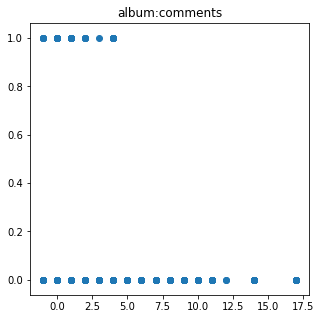

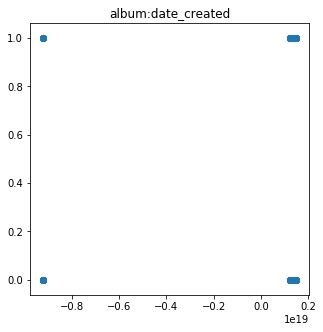

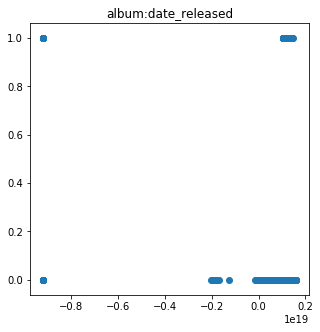

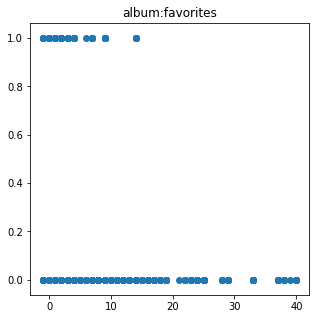

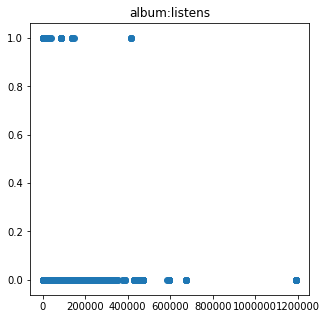

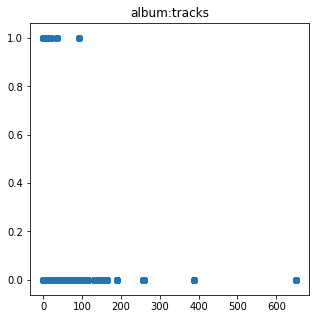

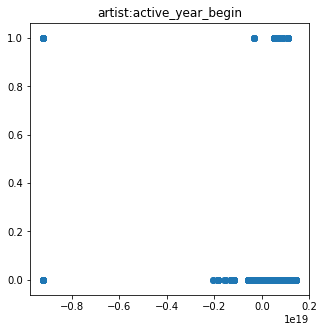

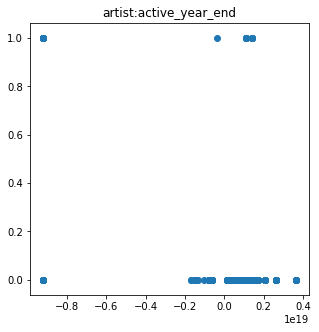

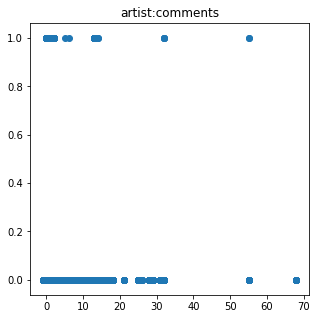

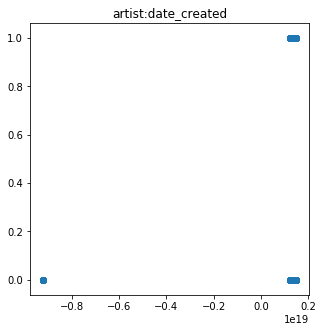

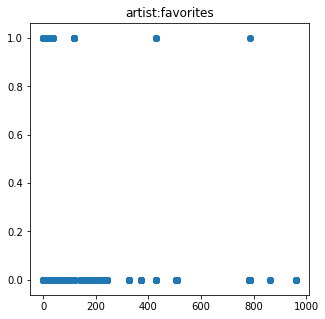

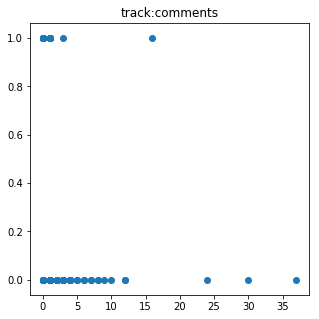

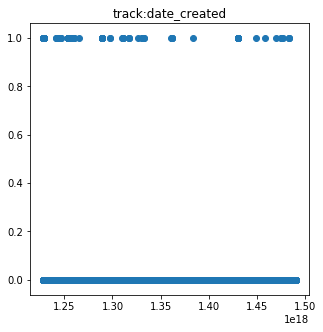

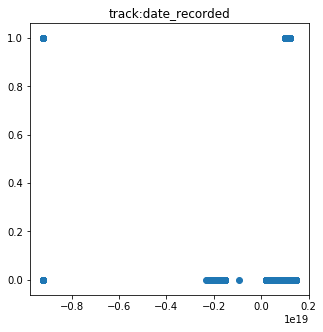

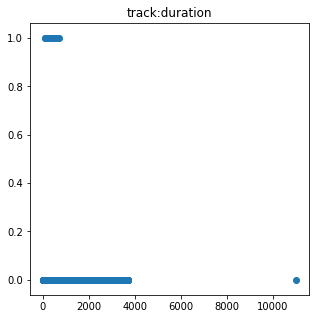

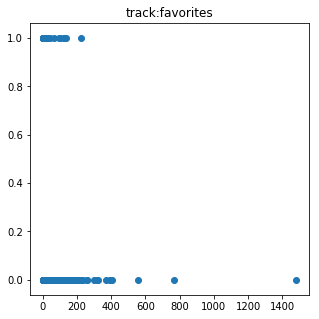

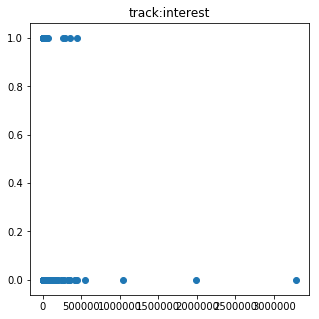

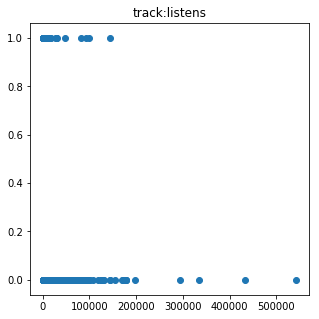

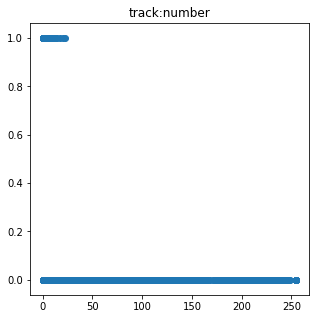

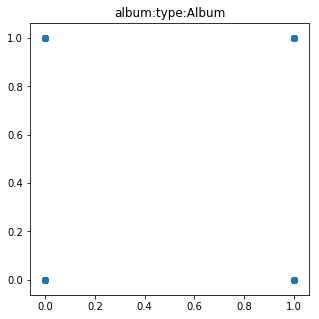

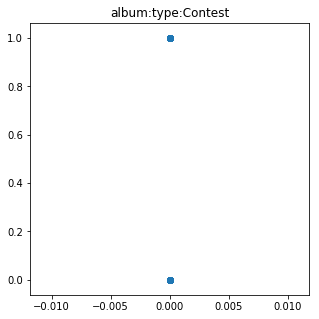

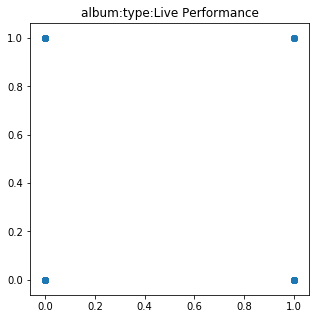

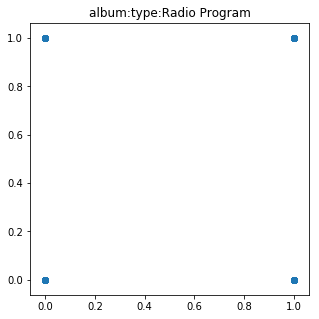

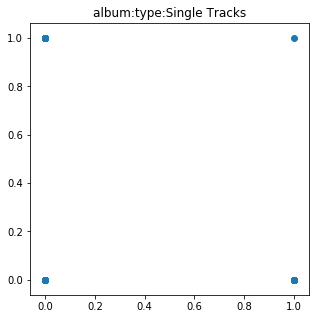

In [189]:
for c in X:
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    ax.scatter(X[c], (Y_pred == Y))
    ax.set_title(c)
plt.show()

In [124]:
display(HTML("<script src='https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.5/MathJax.js?config=TeX-MML-AM_CHTML'></script>"))
display(Math(r'$$\begin{eqnarray} P(k(c)) = \frac{\exp(k(c))}{1 + \exp(k(c))} \end{eqnarray}$$'))
for c in Y:
    if c.split("_")[-1] not in ["pred", "prob"]:
        rfe = rfes[c]
        s = "{:.8E}".format(float(rfe.estimator_.intercept_))
        out = r'$$\begin{{eqnarray}} k({}) & = & {}{:.8E} \\'.format(r"\_".join(c.split("_")), r"\;\:" * (16 - len(s)), Decimal(float(rfe.estimator_.intercept_)))
        used = []
        for i in range(len(rfe.support_)):
            if rfe.support_[i]:
                used.append(cols[i])
        for i in range(len(used)):
            coef = float(rfe.estimator_.coef_[0][i])
            if coef < 0:
                s = "{:.8E}".format(Decimal(-coef))
                out += " & - & {}{:.8E} ".format(r"\;\:" * (16 - len(s)), Decimal(-coef))+r" \cdot "+r"\_".join(used[i].split("_"))+r"\\"
            else:
                s = "{:.8E}".format(Decimal(coef))
                out += " & + & {}{:.8E} ".format(r"\;\:" * (16 - len(s)), Decimal(coef))+r" \cdot "+r"\_".join(used[i].split("_"))+r"\\"
        out += r"\end{eqnarray}$$"
        display(Math(r'{}'.format(out)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [165]:
Y_all = Y.copy()
prob_cols = [x for x in Y_all if x.split("_")[-1] == "prob"]
pred_cat = Y_col+"_cat"
Y_all[pred_cat] = Y_all[prob_cols].idxmax(axis=1).str.split(":").str.get(-1).str.split("_").str.get(0)
pred_corr = ":".join(list(Y_all)[0].split(":")[:-1])+"_true"
Y_all[pred_corr] = 0
Y_all[Y_col] = df[Y_col]
Y_all[Y_all[Y_col] == Y_all[pred_cat]][pred_corr] = 1
print(Y_all[pred_cat])
print(Y_all[pred_corr].sum() / Y_all[pred_corr].count())

0         Easy Listening
1         Easy Listening
2         Easy Listening
3         Easy Listening
4         Easy Listening
5         Easy Listening
6         Easy Listening
7         Easy Listening
8         Easy Listening
9         Easy Listening
10        Easy Listening
11        Easy Listening
12        Easy Listening
13        Easy Listening
14        Easy Listening
15        Easy Listening
16        Easy Listening
17        Easy Listening
18        Easy Listening
19        Easy Listening
20        Easy Listening
21        Easy Listening
22        Easy Listening
23        Easy Listening
24        Easy Listening
25        Easy Listening
26        Easy Listening
27        Easy Listening
28        Easy Listening
29        Easy Listening
               ...      
106544    Easy Listening
106545    Easy Listening
106546    Easy Listening
106547    Easy Listening
106548    Easy Listening
106549    Easy Listening
106550    Easy Listening
106551    Easy Listening
106552    Easy Listening
